# Extra Practise

For an optional bit of "on your own" practise, lets take this Kaggle Pokemon dataset (https://www.kaggle.com/abcsds/pokemon) and try and answer a few questions visually:

1. What does the Attack vs Defense distribution look like? 
    1. Advanced: Break it down by Type
2. What are the top 10 pokemon by summed attributes?
    1. Can you modify the load in code and do this for a different generation, or only for "Mega" pokemon?
3. What are the distributions of battle states (HP, attack through to speed)?
    1. Even better, what are the distributions, by type of pokemon, for the above question

Download the data, and this code should get you started. Remember that there are a thousand ways to answe these questions. If your solution looks completely different to mine, that's fine! I'm going to quickly restrict the data and only look at Gen1 Pokemon without the "Mega" label for simplicity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import numpy as np

df = pd.read_csv("Pokemon.csv")
# Filtering on the data. Don't get caught up on this, we'll cover it very soon!
df = df[df.Generation == 1 & ~df.Name.str.contains("Mega")]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


## Pokemon Attack and Defense Correlation

In [3]:
df.Attack.corr(df.Attack)

0.9999999999999999

## Strongest Pokemon by Summed Stats

In [9]:
df[df.Total == df.Total.max()]['Name'].values[0]

'Mewtwo'

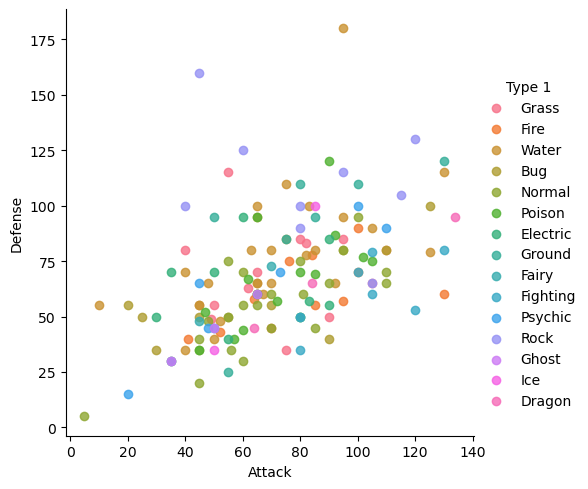

In [15]:
# linear model plot in seaborn
sb.lmplot(df, x="Attack", y="Defense",hue="Type 1", fit_reg=False)

<Axes: xlabel='Name'>

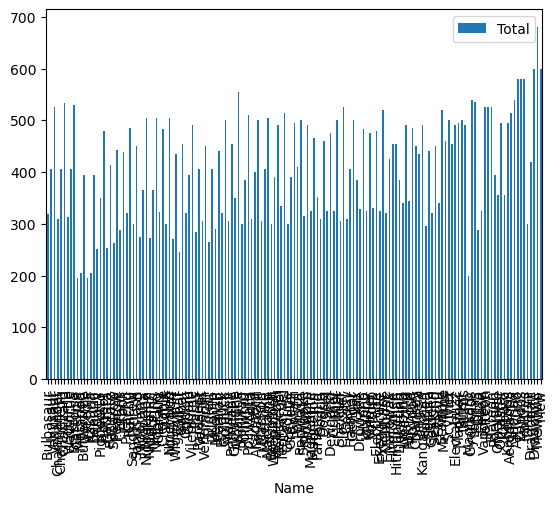

In [20]:
df.plot.bar("Name", "Total")

In [16]:
df.sort_values("Total", ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [18]:
df.sort_values("Total", ascending=False).iloc[:20, :]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False


<Axes: xlabel='Name'>

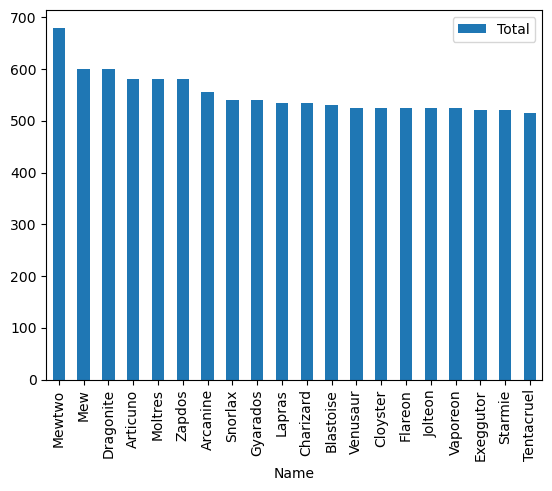

In [19]:
df.sort_values("Total", ascending=False).iloc[:20, :].plot.bar("Name", "Total")

## Distribution of Battle stats

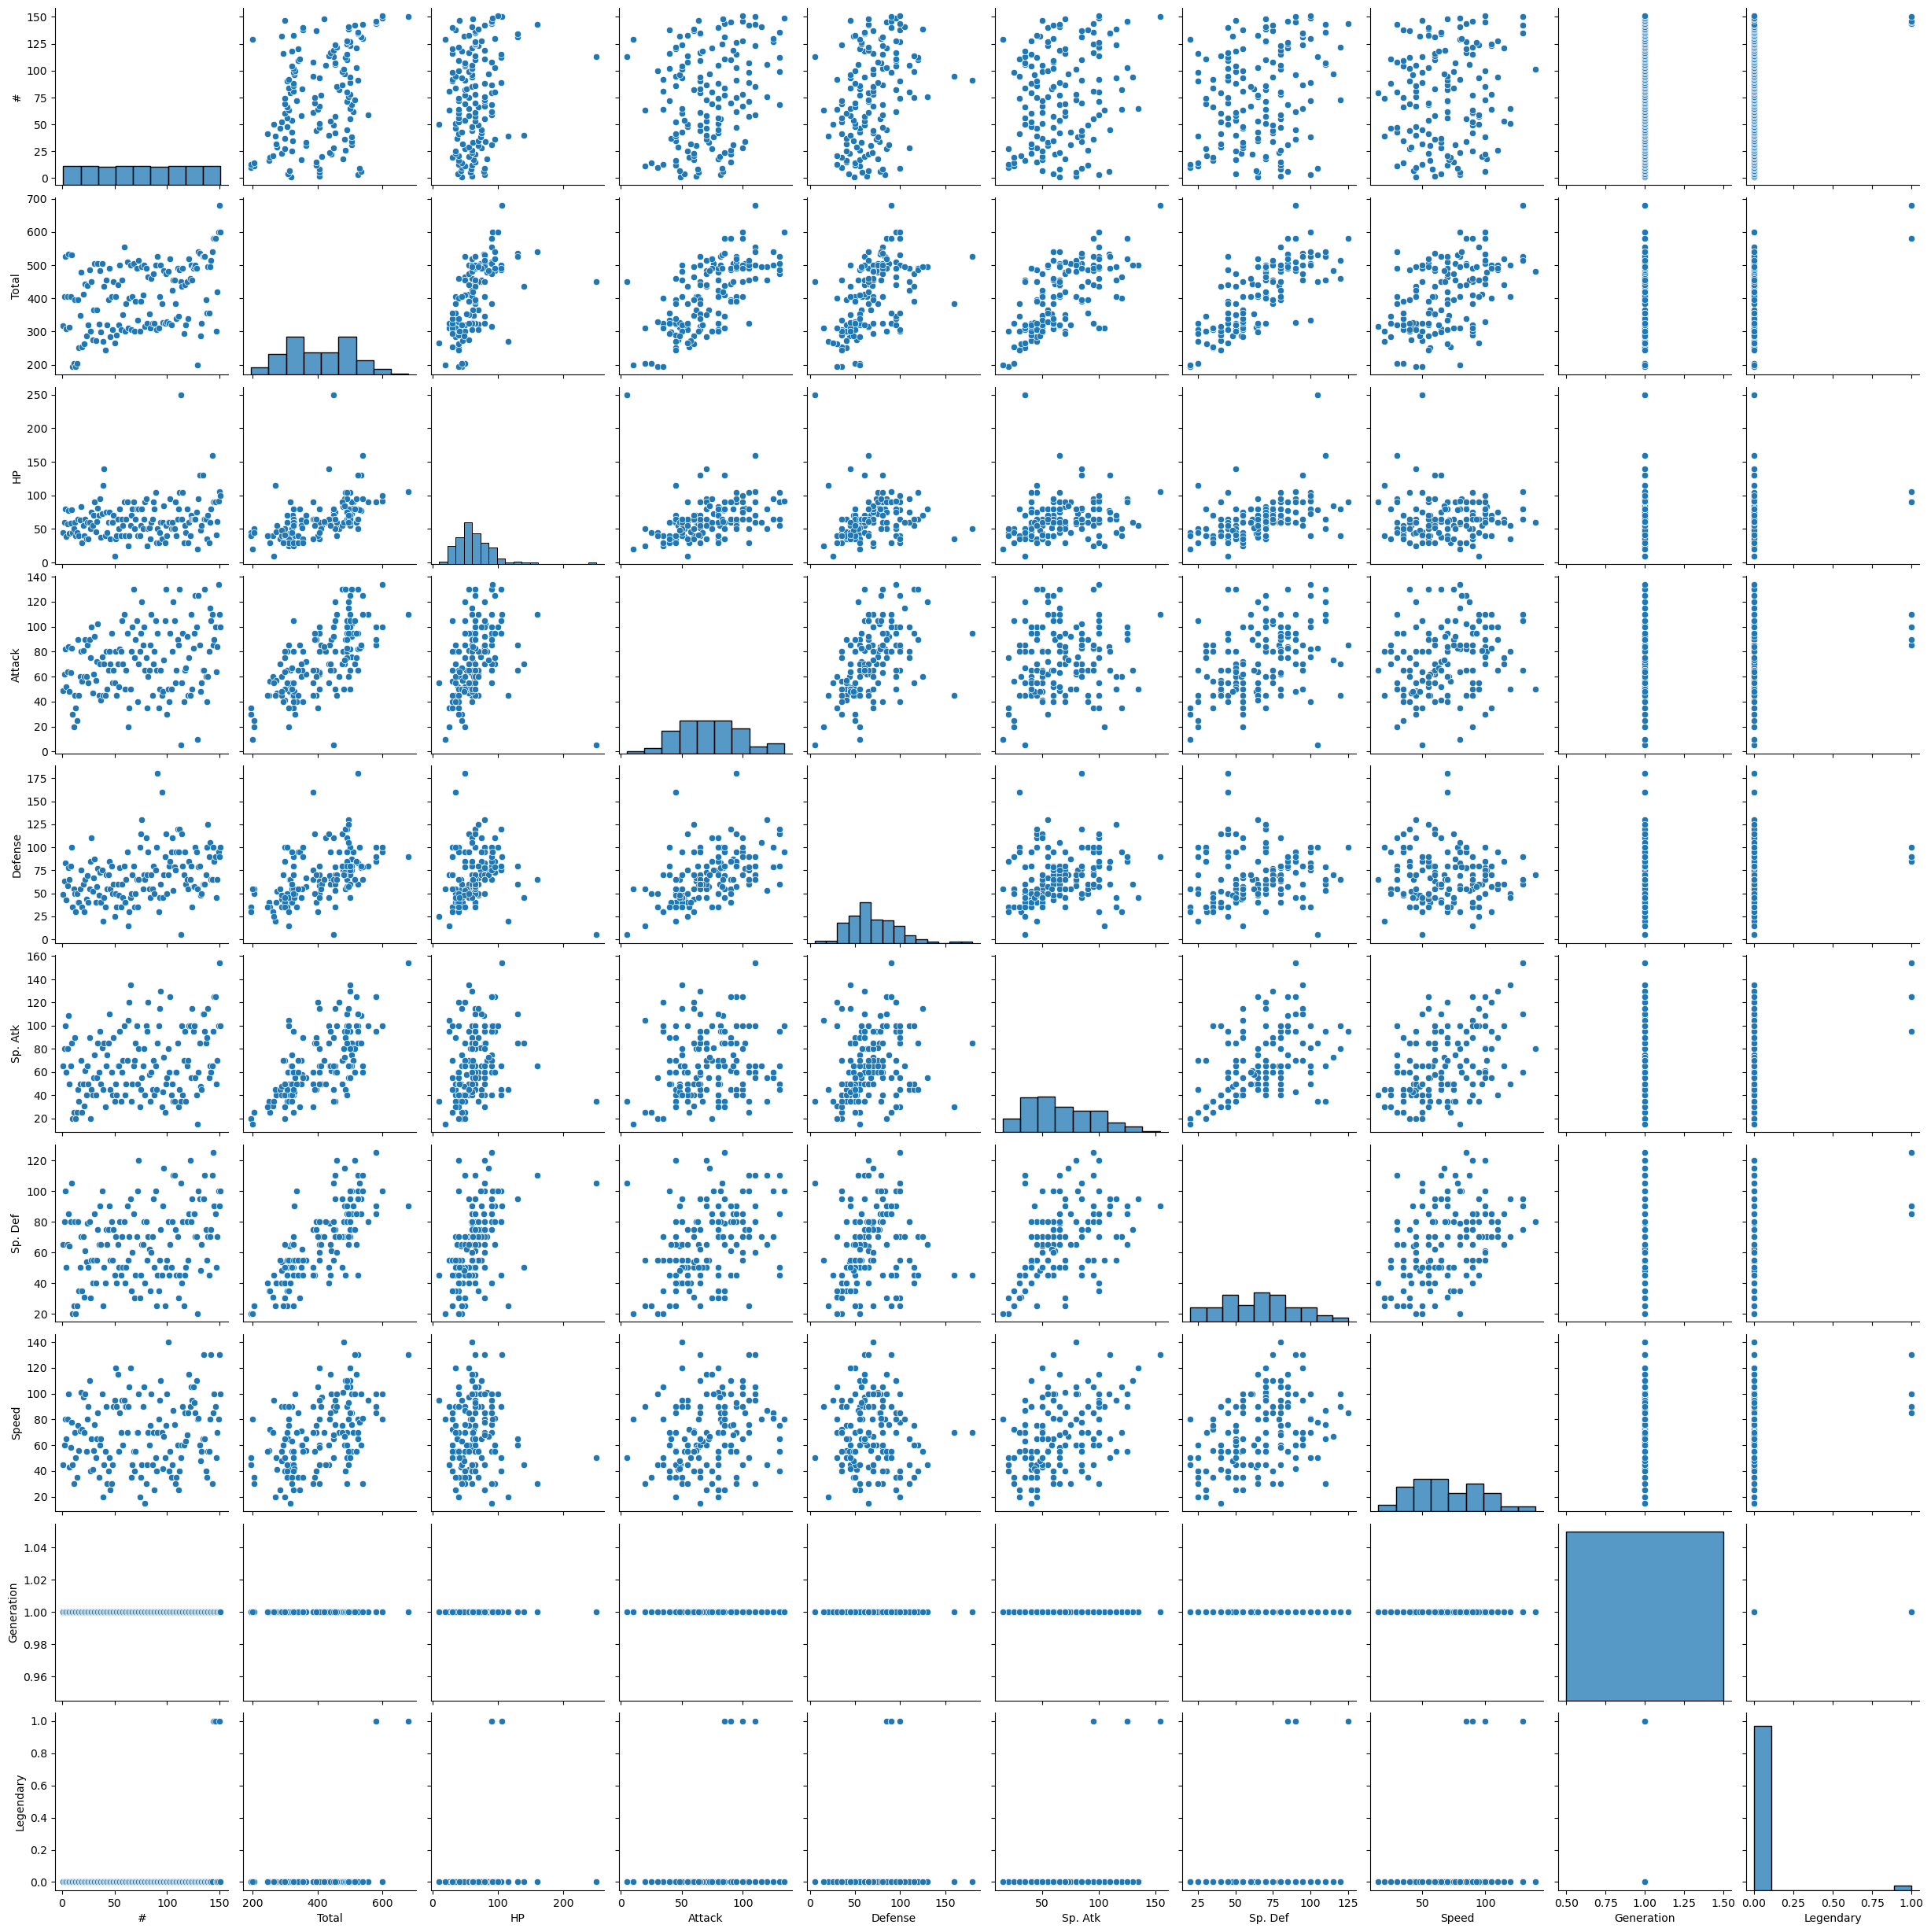

In [23]:
column = df.columns[5:-2]
sb.pairplot(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 165
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           151 non-null    int64 
 1   Name        151 non-null    object
 2   Type 1      151 non-null    object
 3   Type 2      67 non-null     object
 4   Total       151 non-null    int64 
 5   HP          151 non-null    int64 
 6   Attack      151 non-null    int64 
 7   Defense     151 non-null    int64 
 8   Sp. Atk     151 non-null    int64 
 9   Sp. Def     151 non-null    int64 
 10  Speed       151 non-null    int64 
 11  Generation  151 non-null    int64 
 12  Legendary   151 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 15.5+ KB


In [25]:
df[df.columns[5:-2]].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


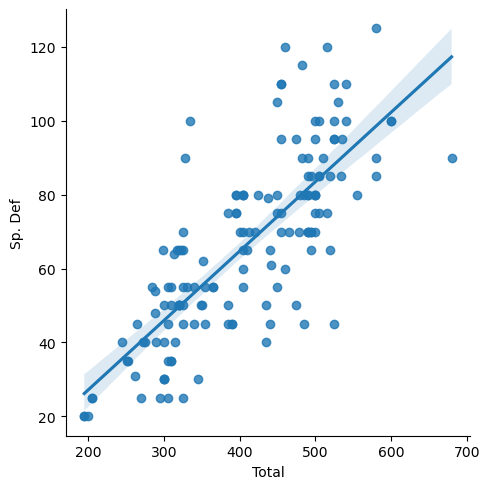

In [30]:
sb.lmplot(df, x="Total", y="Sp. Def")